<a href="https://colab.research.google.com/github/CaptainAshis/Time_Series_Python-SQL/blob/master/TimeSeries3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from statsmodels.tsa.ar_model import AR,ARResults

In [0]:
%cd drive/'My Drive'/amex/

/content/drive/My Drive/amex


In [0]:
# ls

In [0]:
# Non- stationary dataset-Seasonal
df1=pd.read_csv('airline.csv',index_col='Month',parse_dates=True)

df1.index.freq='MS'

In [0]:
# Stationary dataset- Non seasonal
df2=pd.read_csv('femaleBirth.csv',index_col='Date',parse_dates=True)

df2.index.freq='D'

In [0]:
!pip install pmdarima
# import pmdarima

     |████████████████████████████████| 921kB 4.8MB/s 
     |████████████████████████████████| 24.8MB 33.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0


In [0]:
from pmdarima import auto_arima

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, exogenous=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=10, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method=None, transparams=True, solver='lbfgs', maxiter=None, disp=0, callback=None, offset_test_args=None, seasonal_test_args=None, suppress_warnings=False, error_action='warn', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept=True, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R fu

seasonal=False , as the descripticve stats that we ran gave us its not a seasonal dataset.

In [0]:
stepwise_fit=auto_arima(df2['Births'],start_p=0,start_q=0,max_p=6,max_q=3,seasonal=False,trace=True)
# 

Fit ARIMA: order=(0, 1, 0); AIC=2650.760, BIC=2658.555, Fit time=0.015 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2565.234, BIC=2576.925, Fit time=0.038 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2463.584, BIC=2475.275, Fit time=0.054 seconds
Fit ARIMA: order=(1, 1, 1); AIC=2460.154, BIC=2475.742, Fit time=0.111 seconds
Fit ARIMA: order=(1, 1, 2); AIC=2460.515, BIC=2480.001, Fit time=0.481 seconds
Fit ARIMA: order=(2, 1, 2); AIC=2461.876, BIC=2485.259, Fit time=0.674 seconds
Fit ARIMA: order=(2, 1, 1); AIC=2461.271, BIC=2480.757, Fit time=0.158 seconds
Total fit time: 1.552 seconds


6*3 =18 models , if included 0 then its 7*4 28 models. Trace=True, shows output of first couple of Arima models that we are trying to fit. Autoarima uses AIC to fit the models as it punishes overcomplicated models. Even after raising the order the value higher and higher , if the AIC remains constant , its gonna stop and not fit every single model in the grid search. HEre it doesnt goes upto max_q=6 as the AIC plateaus.

In [0]:
stepwise_fit.summary()
# It gives us best ARIMA model taht we should use

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1226.077
Method:                       css-mle   S.D. of innovations              7.000
Date:                Thu, 27 Jun 2019   AIC                           2460.154
Time:                        01:26:53   BIC                           2475.742
Sample:                             1   HQIC                          2466.350
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.014      1.068      0.286      -0.013       0.043
ar.L1.D.y      0.1299      0.056      2.334      0.020       0.021       0.239
ma.L1.D.y     -0.9694      0.019    -51.415      0.000      -1.006      -0.932
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.6996           +0.0000j            7.6996            0.0000
MA.1            1.0316           +0.0000j            1.0316            0.0000
-----------------------------------------------------------------------------
"""

This above grid search approach is the best way to avoid human bias that creeps into while reading the acf and PACF plots.

# Non- stationary dataset-Seasonal

In [0]:
stepwise_fit=auto_arima(df1['Passengers'],start_p=1,start_q=1,max_p=4,max_q=4,seasonal=True,trace=True,m=12)
# seasonal=True using dickey fuller test. m = no of periods in each season.

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1024.195, BIC=1041.446, Fit time=1.568 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1033.479, BIC=1039.229, Fit time=0.025 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1022.316, BIC=1033.817, Fit time=0.454 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1022.904, BIC=1034.405, Fit time=0.564 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1022.343, BIC=1030.968, Fit time=0.135 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=1021.137, BIC=1035.513, Fit time=1.400 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1017.166, BIC=1034.417, Fit time=4.793 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1033.843, BIC=1048.219, Fit time=4.403 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1018.210, BIC=1038.336, Fit time=5.738 seconds
Fit ARIMA: order=(1, 1, 1) s

In [0]:
# For some of the simple models it wasnt able to grab the aic , also it has lowercase and upercase p,d,q (order=(1, 1, 1) seasonal_order=(1, 1, 1, 12))

In [0]:
stepwise_fit.summary()
# (2, 1, 1, 12) seasonal components

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -499.528
Date:                            Thu, 27 Jun 2019   AIC                           1015.057
Time:                                    01:28:08   BIC                           1038.058
Sample:                                         0   HQIC                          1024.403
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.018      0.019      0.985      -0.035       0.035
ar.L1          0.5262      0.099      5.321      0.000       0.332       0.720
ar.L2          0.2602      0.101      2.575      0.010       0.062       0.458
ma.L1         -0.9745      0.062    -15.749      0.000      -1.096      -0.853
ar.S.L12       0.7239      0.409      1.768      0.077      -0.079       1.526
ar.S.L24       0.2677      0.129      2.079      0.038       0.015       0.520
ma.S.L12      -0.9597      1.099     -0.873      0.382      -3.114       1.194
sigma2       115.2618     70.774      1.629      0.103     -23.452     253.976
===================================================================================
Ljung-Box (Q):                       51.71   Jarque-Bera (JB):                11.53
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               2.72   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
# arma_order_select_ic. Check out the actual notebook from the paid course.

In [0]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [0]:
df2=df2[:120]

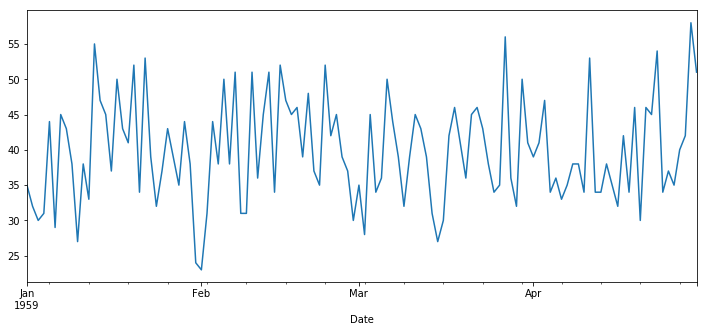

In [0]:
df2['Births'].plot(figsize=(12,5))

In [0]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
  """Pass in a time series and an optional title, returns an adf report"""
  print(f'Augmented Dickey Fuller Test:{title}')
  result=adfuller(series.dropna(),autolag='AIC') # dropna handles the differenced data
  
  labels=['ADF Test Statistics','p-value','# Lags used','# Observations']
  out=pd.Series(result[0:4],index=labels)
  
  for k , v in result[4].items():
    out[f'critical value ({k})']=v
    
  print(out.to_string()) # to_string() removes the line "dtype:float64"
  
  if result[1]<=0.05:
    print("Strong evidence against the null hypothesis")
    print("Reject the null hypothesis")
    print("Data has no unit root and is stationary")
  else:
    print("Weak evidence against the null hypothesis")
    print("Fail the null hypothesis")
    print("Data has a unit root and is non-stationary")

In [0]:
adf_test(df2['Births'])

Augmented Dickey Fuller Test:
ADF Test Statistics    -9.855384e+00
p-value                 4.373545e-17
# Lags used             0.000000e+00
# Observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


p-value is less than 0.05 hence its stationary

In [0]:
auto_arima(df2['Births'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(2, 2)   Log Likelihood                -405.370
Method:                       css-mle   S.D. of innovations              6.991
Date:                Thu, 27 Jun 2019   AIC                            822.741
Time:                        01:28:10   BIC                            839.466
Sample:                             0   HQIC                           829.533
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8163      0.108    368.848      0.000      39.605      40.028
ar.L1.y        1.8569      0.081     22.935      0.000       1.698       2.016
ar.L2.y       -0.8814      0.073    -12.032      0.000      -1.025      -0.738
ma.L1.y       -1.8634      0.109    -17.126      0.000      -2.077      -1.650
ma.L2.y        0.8634      0.108      8.020      0.000       0.652       1.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0533           -0.1582j            1.0651           -0.0237
AR.2            1.0533           +0.1582j            1.0651            0.0237
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.1582           +0.0000j            1.1582            0.0000
-----------------------------------------------------------------------------
"""

# ***1 Month Forecast** 

In [0]:
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [0]:
len(df2)

120

In [0]:
train=df2.iloc[:90]
test=df2.iloc[90:]

In [0]:
model=ARMA(train['Births'],order=(2,2))
result=model.fit()

In [0]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Thu, 27 Jun 2019   AIC                            627.809
Time:                        01:28:10   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.501      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.801      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.557      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [0]:
start=len(train)
end=len(train)+len(test)-1
predictions=result.predict(start,end).rename('ARMA (2,2) Predictions')


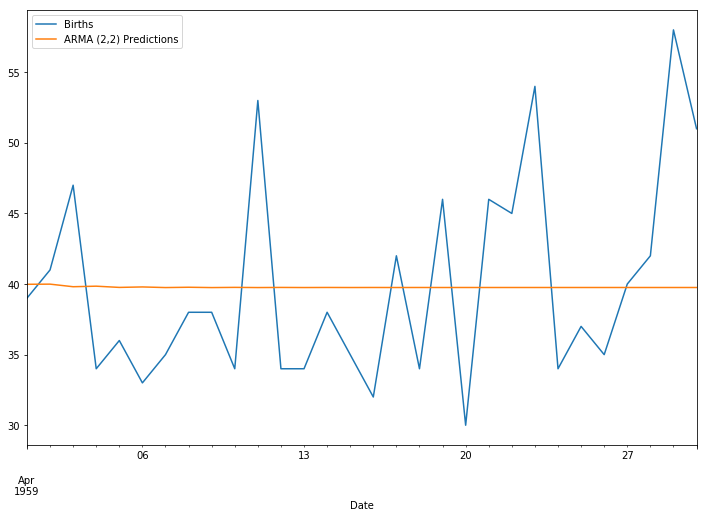

In [0]:
test['Births'].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)

Since our starting dataset exhibhit no trend or seasonality that we conformed using ADF test, this prediction makes sense as it forecasted avg value. Our model wasnt able to predict the noise , but was able to predict the actual mean avg for the next month of data

In [0]:
test.mean(),predictions.mean()

(Births    39.833333
 dtype: float64, 39.777434306528306)

# **ARIMA**

In [0]:
!curl --header 'Host: fred.stlouisfed.org' --user-agent 'Mozilla/5.0 (Windows NT 6.3; Win64; x64; rv:67.0) Gecko/20100101 Firefox/67.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://fred.stlouisfed.org/series/INVCMRMTSPL' --cookie '_ga=GA1.2.1721668011.1561568025; _gid=GA1.2.1087370694.1561568025; G_ENABLED_IDPS=google; _gid=GA1.3.1087370694.1561568025; _ga=GA1.3.1721668011.1561568025; _gat_UA-9926151-28=1' --header 'Upgrade-Insecure-Requests: 1' 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=INVCMRMTSPL&scale=left&cosd=1967-01-01&coed=2019-03-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2019-06-26&revision_date=2019-06-26&nd=1967-01-01' --output 'inventory.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14206  100 14206    0     0  23212      0 --:--:-- --:--:-- --:--:-- 23212


In [0]:
pwd

'/content/drive/My Drive/amex'

In [0]:
df1=pd.read_csv('inventory.csv',index_col='DATE',parse_dates=True)

df1.index.freq='MS'
df1.head()

,INVCMRMTSPL
DATE,
1967-01-01,518404.351
1967-02-01,521161.233
1967-03-01,523994.722
1967-04-01,526049.534
1967-05-01,527402.278


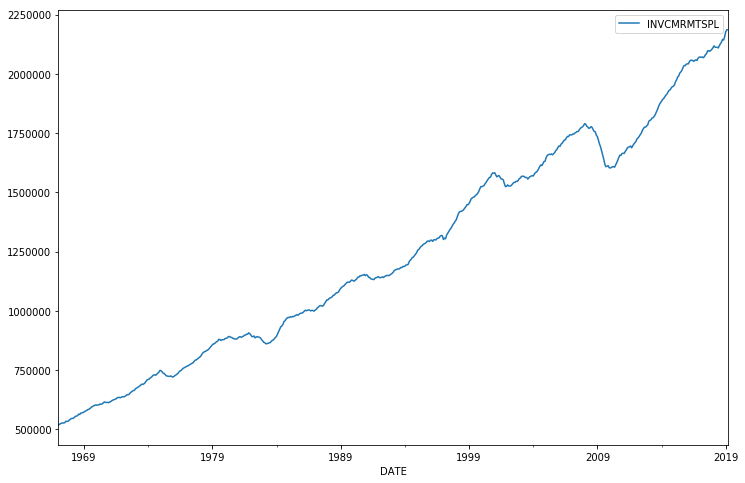

In [0]:
df1.plot(figsize=(12,8))

In [0]:
df1=df1[df1.index>pd.to_datetime('1997-01-01')]
df1=df1[df1.index<pd.to_datetime('2018-12-01')]

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
df1.columns

Index(['INVCMRMTSPL'], dtype='object')

In [0]:
df1.rename(columns={'INVCMRMTSPL':'Inventory'},inplace=True)

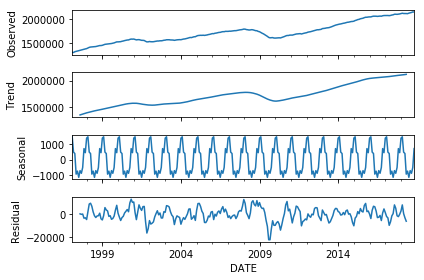

In [0]:
result=seasonal_decompose(df1['Inventory'],model='add')
result.plot();

Since the seasonality doesnt have much variation , lets assume it wont have much effect

In [0]:
auto_arima(df1['Inventory'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  261
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2588.239
Method:                       css-mle   S.D. of innovations           4897.606
Date:                Thu, 27 Jun 2019   AIC                           5186.479
Time:                        01:44:28   BIC                           5204.301
Sample:                             1   HQIC                          5193.643
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3201.3104   1343.420      2.383      0.018     568.255    5834.366
ar.L1.D.y      0.9169      0.036     25.587      0.000       0.847       0.987
ma.L1.D.y     -0.5145      0.076     -6.790      0.000      -0.663      -0.366
ma.L2.D.y     -0.1046      0.071     -1.479      0.140      -0.243       0.034
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0907           +0.0000j            1.0907            0.0000
MA.1            1.4914           +0.0000j            1.4914            0.0000
MA.2           -6.4109           +0.0000j            6.4109            0.5000
-----------------------------------------------------------------------------
"""

### ACF and PACF plots

In [0]:
from statsmodels.tsa.statespace.tools import diff

In [0]:
df1['Diff_1']=diff(df1['Inventory'],k_diff=1)
adf_test(df1['Diff_1'])

Augmented Dickey Fuller Test:
ADF Test Statistics      -3.527510
p-value                   0.007308
# Lags used               4.000000
# Observations          256.000000
critical value (1%)      -3.456155
critical value (5%)      -2.872897
critical value (10%)     -2.572822
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [0]:
# Dickey fuller test is agreeing what auto_arima suggested that in order to use AR and ma component we have to make sure the data is stationary and to make data stationary 
# In order to make data stationary , we should use a diff test of 1 .Data has no unit root and is stationary from the p-value.

### PACF and ACF plots . p for AR component and q for MA component.

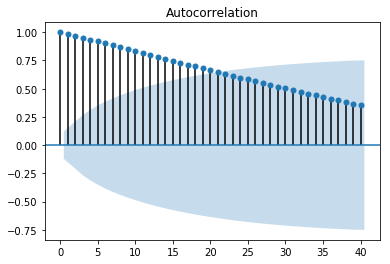

In [0]:
plot_acf(df1['Inventory'], lags=40);

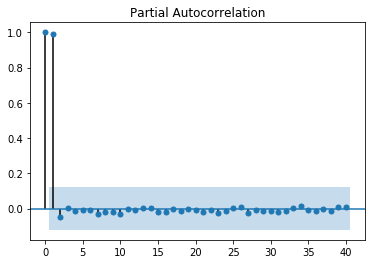

In [0]:
plot_pacf(df1['Inventory'],lags=40);

In [0]:
# how to choose p, d , q the classical way?

In [0]:
# d is easiest to found .Its basically keep differencing untill the data is stationary. Depending on adf test after 1 differencing we see Data has no unit root and is stationary
# Try diff values of k_diff(differencing) and after few values of differencing , we will pass adf test. Or plot diff p-values using different k_diff values.The classical 
# approach will focus on either AR or MA component.

In [0]:
# https://people.duke.edu/~rnau/411arim3.htm :- Rule 6: If the PACF of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive--i.e.,
# if the series appears slightly "underdifferenced"--then consider adding an AR term to the model. The lag at which the PACF cuts off is the indicated number of AR terms.
# From pacf plot we get p component or AR component.
# If the PACF displays a sharp cutoff while the ACF decays more slowly (i.e., has significant spikes at higher lags), we say that the stationarized series displays
# an "AR signature," meaning that the autocorrelation pattern can be explained more easily by adding AR terms than by adding MA terms. 
# We can go with MA=1 , just to have MA component

# AR=1
# I=1
# MA=1,0
# Check out which one has less error

# https://otexts.com/fpp2/arima-r.html

In [0]:
stepwise_fit=auto_arima(df1['Inventory'],start_p=0,start_q=0,max_p=2,max_q=2,seasonal=False,trace=True)
stepwise_fit.summary()

Fit ARIMA: order=(0, 1, 0); AIC=5306.174, BIC=5313.303, Fit time=0.005 seconds
Fit ARIMA: order=(1, 1, 0); AIC=5204.813, BIC=5215.507, Fit time=0.063 seconds
Fit ARIMA: order=(0, 1, 1); AIC=5236.027, BIC=5246.721, Fit time=0.049 seconds
Fit ARIMA: order=(2, 1, 0); AIC=5197.547, BIC=5211.805, Fit time=0.097 seconds
Fit ARIMA: order=(2, 1, 1); AIC=5186.975, BIC=5204.798, Fit time=0.188 seconds
Fit ARIMA: order=(1, 1, 1); AIC=5186.719, BIC=5200.977, Fit time=0.115 seconds
Fit ARIMA: order=(1, 1, 2); AIC=5186.479, BIC=5204.301, Fit time=0.089 seconds
Fit ARIMA: order=(0, 1, 2); AIC=5227.100, BIC=5241.358, Fit time=0.058 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.697 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  261
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2588.239
Method:                       css-mle   S.D. of innovations           4897.606
Date:                Thu, 27 Jun 2019   AIC                           5186.479
Time:                        02:08:06   BIC                           5204.301
Sample:                             1   HQIC                          5193.643
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3201.3104   1343.420      2.383      0.018     568.255    5834.366
ar.L1.D.y      0.9169      0.036     25.587      0.000       0.847       0.987
ma.L1.D.y     -0.5145      0.076     -6.790      0.000      -0.663      -0.366
ma.L2.D.y     -0.1046      0.071     -1.479      0.140      -0.243       0.034
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0907           +0.0000j            1.0907            0.0000
MA.1            1.4914           +0.0000j            1.4914            0.0000
MA.2           -6.4109           +0.0000j            6.4109            0.5000
-----------------------------------------------------------------------------
"""

In [0]:
len(df1),len(df1)-12

(262, 250)

In [0]:
train=df1.iloc[:250]
test=df1.iloc[250:]

### Model fitting

In [0]:
# order=(1,1,1) returned by auto_arima()
model=ARIMA(train['Inventory'],order=(1,1,1))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Inventory   No. Observations:                  249
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2467.457
Method:                       css-mle   S.D. of innovations           4862.051
Date:                Thu, 27 Jun 2019   AIC                           4942.915
Time:                        02:12:31   BIC                           4956.984
Sample:                    03-01-1997   HQIC                          4948.578
                         - 11-01-2017                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3180.9519   1346.475      2.362      0.019     541.909    5819.995
ar.L1.D.Inventory     0.9010      0.040     22.457      0.000       0.822       0.980
ma.L1.D.Inventory    -0.5542      0.081     -6.824      0.000      -0.713      -0.395
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1098           +0.0000j            1.1098            0.0000
MA.1            1.8045           +0.0000j            1.8045            0.0000
-----------------------------------------------------------------------------
"""

### Model predictions

In [0]:
start=len(train)
end=len(train)+len(test)-1
predictions=results.predict(start=start,end=end,typ='levels').rename('ARIMA (1,1,1) Predictions')
# typ='linear' means  it will return the predictions differenced by 1. This will come into scene when we use d parameter >=1.

In [0]:
test

,Inventory,Diff_1
DATE,,
2017-12-01,2103751.0,4614.0
2018-01-01,2110158.0,6407.0
2018-02-01,2118199.0,8041.0
2018-03-01,2112427.0,-5772.0
2018-04-01,2112276.0,-151.0
2018-05-01,2111835.0,-441.0
2018-06-01,2109298.0,-2537.0
2018-07-01,2119618.0,10320.0
2018-08-01,2127170.0,7552.0


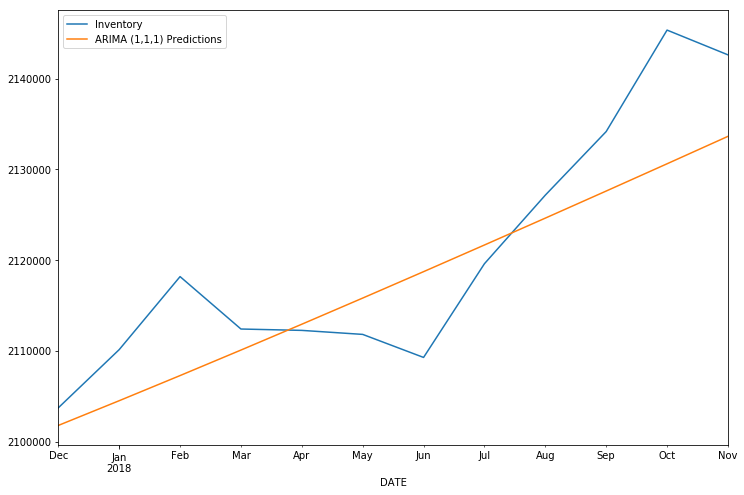

In [0]:
test['Inventory'].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)

In [0]:
# In the beginning we had minor seasonal component, and we ignored it due to its scale and our problem statement. So our predictions is showing us the trend and it may or may not
# capture the seasonality values. Trend is good , Lets evaluate the model.


In [0]:
from statsmodels.tools.eval_measures import rmse
error=rmse(test['Inventory'],predictions)
error

7165.870973258091

In [0]:
test['Inventory'].mean()

2120572.75

In [0]:
# We are pretty close during April 2018 and Aug 2018.We overestimate and underestimate sometimes but general trend line is pretty good.

In [0]:

predictions.mean() # is pretty close to test['Inventory'].mean()

2117458.0157158133

# Forecast into unknown future . Retrain everything else as the data changes

In [0]:
model=ARIMA(df1['Inventory'],order=(1,1,1))
results=model.fit()
fcast=results.predict(start=len(df1),end=len(df1)+11, typ='levels').rename('ARIMA (1,1,1) Forecasts')

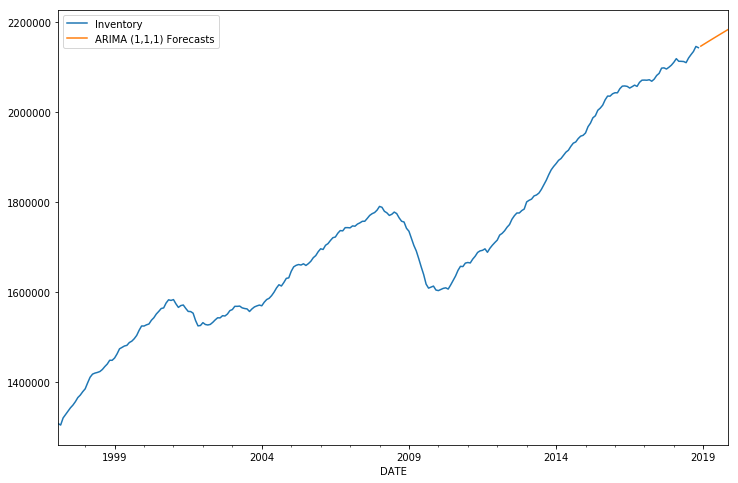

In [0]:
df1['Inventory'].plot(figsize=(12,8),legend=True)
fcast.plot(legend=True)